<a href="https://colab.research.google.com/github/NataliaOlarte/Ciencia_de_datos/blob/main/ProyectoLoL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Ciencia de datos

## 1. Importe de datos

Se pone el api-Key para obtener el PUUID del jugador

In [ ]:
import requests

API_KEY = "RGAPI-3fce6ada-dcf9-4670-8aaa-4b141b082180"
NOMBRE_INVOCADOR = "Veroluna32"
TAGLINE = "LAN"

# URL para obtener el puuid del jugador
url = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{NOMBRE_INVOCADOR}/{TAGLINE}"

headers = {"X-Riot-Token": API_KEY}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    print("PUUID:", data["puuid"])
else:
    print("Error:", response.status_code, response.text)


PUUID: EAJvQIRtpInZfjRxlpNw6d-twJ__sPyC9YIskQubBZZefS5gW1uxX_wZ2KJwGkKi-BiSKNi85O9oNA


**Importe de partidas**

Con  el PUUID pedimos als erver que nos envie el id de  las ultimas 100 partidas.



In [ ]:
import requests

API_KEY = "RGAPI-3fce6ada-dcf9-4670-8aaa-4b141b082180"
PUUID = "EAJvQIRtpInZfjRxlpNw6d-twJ__sPyC9YIskQubBZZefS5gW1uxX_wZ2KJwGkKi-BiSKNi85O9oNA"
REGION = "americas"

# URL para obtener el historial de partidas
url = f"https://{REGION}.api.riotgames.com/lol/match/v5/matches/by-puuid/{PUUID}/ids?start=0&count=100"

headers = {"X-Riot-Token": API_KEY}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    match_ids = response.json()
    print("Últimos 100 partidos:", match_ids)
else:
    print("Error:", response.status_code, response.text)

Últimos 100 partidos: ['LA1_1621968083', 'LA1_1621953043', 'LA1_1621947029', 'LA1_1621937005', 'LA1_1621928873', 'LA1_1620707250', 'LA1_1620702680', 'LA1_1620669620', 'LA1_1620661452', 'LA1_1620653774', 'LA1_1620483174', 'LA1_1620195042', 'LA1_1620184762', 'LA1_1620173965', 'LA1_1620172729', 'LA1_1620146298', 'LA1_1620138788', 'LA1_1619688759', 'LA1_1619682675', 'LA1_1619673822', 'LA1_1619505271', 'LA1_1619496724', 'LA1_1619495455', 'LA1_1619488755', 'LA1_1619304306', 'LA1_1619289774', 'LA1_1619280369', 'LA1_1619270427', 'LA1_1619258563', 'LA1_1619013035', 'LA1_1619003911', 'LA1_1619004054', 'LA1_1618999109', 'LA1_1618984669', 'LA1_1618977080', 'LA1_1618968287', 'LA1_1618955405', 'LA1_1618944883', 'LA1_1618940176', 'LA1_1618766972', 'LA1_1618763201', 'LA1_1618754262', 'LA1_1618742846', 'LA1_1618741589', 'LA1_1618735596', 'LA1_1618730296', 'LA1_1618726955', 'LA1_1618722517', 'LA1_1618719313', 'LA1_1618555942', 'LA1_1618549442', 'LA1_1618544810', 'LA1_1618543199', 'LA1_1618536119', 'LA1_

**Importe de todas las variables que queremos extraer de las partidas.**

Con el numero de las partidas podemos extraer todos los datos necesarios para el analisis. Segmentamos y comentamos los datos para que quede explicada la funcionalidad de cada dato.

In [ ]:
API_KEY = "RGAPI-3fce6ada-dcf9-4670-8aaa-4b141b082180"
PUUID = "EAJvQIRtpInZfjRxlpNw6d-twJ__sPyC9YIskQubBZZefS5gW1uxX_wZ2KJwGkKi-BiSKNi85O9oNA"
REGION = "americas"
match_ids = ['LA1_1621968083', 'LA1_1621953043', 'LA1_1621947029', 'LA1_1621937005', 'LA1_1621928873',
             'LA1_1620707250', 'LA1_1620702680', 'LA1_1620669620', 'LA1_1620661452', 'LA1_1620653774',
             'LA1_1620483174', 'LA1_1620195042', 'LA1_1620184762', 'LA1_1620173965', 'LA1_1620172729',
             'LA1_1620146298', 'LA1_1620138788', 'LA1_1619688759', 'LA1_1619682675', 'LA1_1619673822',
             'LA1_1619505271', 'LA1_1619496724', 'LA1_1619495455', 'LA1_1619488755', 'LA1_1619304306',
             'LA1_1619289774', 'LA1_1619280369', 'LA1_1619270427', 'LA1_1619258563', 'LA1_1619013035',
             'LA1_1619003911', 'LA1_1619004054', 'LA1_1618999109', 'LA1_1618984669', 'LA1_1618977080',
             'LA1_1618968287', 'LA1_1618955405', 'LA1_1618944883', 'LA1_1618940176', 'LA1_1618766972',
             'LA1_1618763201', 'LA1_1618754262', 'LA1_1618742846', 'LA1_1618741589', 'LA1_1618735596',
             'LA1_1618730296', 'LA1_1618726955', 'LA1_1618722517', 'LA1_1618719313', 'LA1_1618555942',
             'LA1_1618549442', 'LA1_1618544810', 'LA1_1618543199', 'LA1_1618536119', 'LA1_1618528388',
             'LA1_1618521624', 'LA1_1618285484', 'LA1_1618284177', 'LA1_1618277641', 'LA1_1618274835',
             'LA1_1618149117', 'LA1_1618137589', 'LA1_1618132864', 'LA1_1618125314', 'LA1_1618119305',
             'LA1_1618110562', 'LA1_1618101986', 'LA1_1618097610', 'LA1_1618095663', 'LA1_1617941410',
             'LA1_1617931280', 'LA1_1617921285', 'LA1_1617910510', 'LA1_1617903254', 'LA1_1617895344',
             'LA1_1617884461', 'LA1_1617874877', 'LA1_1617869885', 'LA1_1617864437', 'LA1_1617361019',
             'LA1_1617350298', 'LA1_1617339770', 'LA1_1617336522', 'LA1_1617321318', 'LA1_1617317839',
             'LA1_1617307863', 'LA1_1617302850', 'LA1_1616891053', 'LA1_1616880562', 'LA1_1616869273',
             'LA1_1616855994', 'LA1_1616852353', 'LA1_1616351338', 'LA1_1616347059', 'LA1_1615642531',
             'LA1_1615633791', 'LA1_1615627861', 'LA1_1615610028', 'LA1_1615602839', 'LA1_1615600674']

# Obtener nombres de ítems desde Riot API
item_url = "https://ddragon.leagueoflegends.com/cdn/14.4.1/data/en_US/item.json"
item_data = requests.get(item_url).json()
item_dict = {int(k): v["name"] for k, v in item_data["data"].items()}  # Convertir IDs a nombres

# Lista para almacenar los datos
data = []

for match_id in match_ids:
    match_url = f"https://{REGION}.api.riotgames.com/lol/match/v5/matches/{match_id}"
    headers = {"X-Riot-Token": API_KEY}
    response = requests.get(match_url, headers=headers)

    if response.status_code == 200:
        match_data = response.json()

        # Encontrar al jugador analizado
        player_data = None
        for participant in match_data["info"]["participants"]:
            if participant["puuid"] == PUUID:
                player_data = participant
                break

        # Si encontramos al jugador, buscamos su enemigo en línea
        if player_data:
            enemy_champion = None
            for participant in match_data["info"]["participants"]:
                if participant["lane"] == player_data["lane"] and participant["teamId"] != player_data["teamId"]:
                    enemy_champion = participant["championName"]
                    break

            data.append({
    "match_id": match_id,  # ID único de la partida
    "game_duration": match_data["info"]["gameDuration"],  # Duración total de la partida en segundos
    "champion": player_data["championName"],  # Nombre del campeón usado
    "role": player_data["role"],  # Rol detectado (normalmente "NONE" en junglas)
    "lane": player_data["lane"],  # Línea asignada (normalmente "JUNGLE" para este caso)

    # Rendimiento del jugador
    "kills": player_data["kills"],  # Número de asesinatos
    "deaths": player_data["deaths"],  # Número de muertes
    "assists": player_data["assists"],  # Número de asistencias

    # Recursos y farmeo
    "goldEarned": player_data["goldEarned"],  # Oro total obtenido
    "totalDamageDealt": player_data["totalDamageDealt"],  # Daño total infligido (a todo tipo de objetivos)
    "csTotal": player_data["totalMinionsKilled"],  # Súbditos totales (incluye línea y jungla)
    "csPerMinute": player_data["totalMinionsKilled"] / (match_data["info"]["gameDuration"] / 60),  # CS por minuto (no es tan útil para jungla)
    "neutralMinionsKilled": player_data["neutralMinionsKilled"],  # Súbditos neutrales eliminados (jungla propia)


    # Información del juego
    "champLevel": player_data["champLevel"],  # Nivel final alcanzado por el jugador
    "gameReset": player_data["gameEndedInEarlySurrender"],  # Si la partida terminó en rendición temprana
    "win": player_data["win"],  # Resultado: victoria o derrota (True o False)

    # Control de visión
    "visionScore": player_data["visionScore"],  # Puntaje de visión total
    "wardsPlaced": player_data["wardsPlaced"],  # Guardianes colocados
    "wardsKilled": player_data["wardsKilled"],  # Guardianes destruidos
    "controlWardsPurchased": player_data["visionWardsBoughtInGame"],  # Guardianes de control comprados

    # Objetivos
    "damage_to_turrets": player_data["damageDealtToTurrets"],  # Daño infligido a torretas
    "damage_to_objectives": player_data["damageDealtToObjectives"],  # Daño a monstruos épicos, torres, inhibidores
    "dragon_kills": player_data["dragonKills"],  # Número de dragones que mató el jugador
    "baron_kills": player_data["baronKills"],  # Número de barones que mató el jugador
    "objective_steals": player_data["objectivesStolen"],  # Robos de objetivos con smite
    "objective_steals_assists": player_data["objectivesStolenAssists"],  # Asistencias en robos de objetivos

    # Inventario
    "items": [item_dict.get(player_data[f"item{i}"], "N/A") for i in range(6)],  # Lista de nombres de ítems (conversión de IDs)

    # Información sobre el oponente (para análisis comparativo)
    "enemy_champion": enemy_champion,  # Nombre del campeón enemigo en el rol opuesto (jungla rival)
            })
    else:
        print(f"Error {response.status_code} al obtener datos de la partida {match_id}")

# Crear DataFrame
df = pd.DataFrame(data)


**Se guarda el dataframe**

In [ ]:
import pandas as pd

In [ ]:
df.to_csv("/content/drive/MyDrive/datos_partidas_lol_final.csv", index=False)
print("Datos guardados en datos_partidas_lol_final.csv")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Lol_ProyectoFinal.csv to Lol_ProyectoFinal.csv


## 2. Exploracion y limpieza  de datos

In [ ]:
df = pd.read_csv("Lol_ProyectoFinal.csv")

**Informacion del dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match_id                  99 non-null     object 
 1   game_duration             99 non-null     int64  
 2   champion                  99 non-null     object 
 3   role                      99 non-null     object 
 4   lane                      99 non-null     object 
 5   kills                     99 non-null     int64  
 6   deaths                    99 non-null     int64  
 7   assists                   99 non-null     int64  
 8   goldEarned                99 non-null     int64  
 9   totalDamageDealt          99 non-null     int64  
 10  csTotal                   99 non-null     int64  
 11  csPerMinute               99 non-null     float64
 12  neutralMinionsKilled      99 non-null     int64  
 13  champLevel                99 non-null     int64  
 14  gameReset   

In [ ]:
df.head()

,match_id,game_duration,champion,role,lane,kills,deaths,assists,goldEarned,totalDamageDealt,...,wardsKilled,controlWardsPurchased,damage_to_turrets,damage_to_objectives,dragon_kills,baron_kills,objective_steals,objective_steals_assists,items,enemy_champion
0,LA1_1621968083,1118,Gragas,SUPPORT,NONE,11,3,14,11602,36799,...,0,0,0,0,0,0,0,0,"[""Archangel's Staff"", 'Refillable Potion', 'St...",Karma
1,LA1_1621953043,2999,Volibear,NONE,JUNGLE,16,9,25,22807,473023,...,5,3,1564,44522,2,0,0,0,"['Riftmaker', 'Iceborn Gauntlet', 'Spirit Visa...",Naafiri
2,LA1_1621947029,1644,Vi,NONE,JUNGLE,3,6,4,9861,147833,...,1,3,315,4476,1,0,0,0,"['Plated Steelcaps', 'Trinity Force', ""Sterak'...",Rengar
3,LA1_1621937005,2015,Sejuani,NONE,JUNGLE,3,8,8,10293,173317,...,5,6,0,27914,1,0,0,0,"['Bramble Vest', 'Plated Steelcaps', 'Chain Ve...",Khazix
4,LA1_1621928873,1877,Volibear,NONE,JUNGLE,8,9,5,12666,159382,...,8,6,592,25035,2,0,2,0,"['Plated Steelcaps', 'Thornmail', ""Giant's Bel...",Vi


**Dataset nuevo con las partidas donde la linea aparece como jungla**

In [ ]:
jungla_df = df[df["lane"] == "JUNGLE"]
jungla_df.head()

,match_id,game_duration,champion,role,lane,kills,deaths,assists,goldEarned,totalDamageDealt,...,wardsKilled,controlWardsPurchased,damage_to_turrets,damage_to_objectives,dragon_kills,baron_kills,objective_steals,objective_steals_assists,items,enemy_champion
1,LA1_1621953043,2999,Volibear,NONE,JUNGLE,16,9,25,22807,473023,...,5,3,1564,44522,2,0,0,0,"['Riftmaker', 'Iceborn Gauntlet', 'Spirit Visa...",Naafiri
2,LA1_1621947029,1644,Vi,NONE,JUNGLE,3,6,4,9861,147833,...,1,3,315,4476,1,0,0,0,"['Plated Steelcaps', 'Trinity Force', ""Sterak'...",Rengar
3,LA1_1621937005,2015,Sejuani,NONE,JUNGLE,3,8,8,10293,173317,...,5,6,0,27914,1,0,0,0,"['Bramble Vest', 'Plated Steelcaps', 'Chain Ve...",Khazix
4,LA1_1621928873,1877,Volibear,NONE,JUNGLE,8,9,5,12666,159382,...,8,6,592,25035,2,0,2,0,"['Plated Steelcaps', 'Thornmail', ""Giant's Bel...",Vi
5,LA1_1620707250,1697,FiddleSticks,NONE,JUNGLE,10,1,11,12499,236634,...,2,6,501,36203,3,1,0,0,"[""Zhonya's Hourglass"", 'N/A', 'Amplifying Tome...",Udyr


In [ ]:
jungla_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 1 to 98
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match_id                  74 non-null     object 
 1   game_duration             74 non-null     float64
 2   champion                  74 non-null     object 
 3   role                      74 non-null     object 
 4   lane                      74 non-null     object 
 5   kills                     74 non-null     int64  
 6   deaths                    74 non-null     int64  
 7   assists                   74 non-null     int64  
 8   goldEarned                74 non-null     int64  
 9   totalDamageDealt          74 non-null     int64  
 10  csTotal                   74 non-null     int64  
 11  csPerMinute               74 non-null     float64
 12  neutralMinionsKilled      74 non-null     int64  
 13  champLevel                74 non-null     int64  
 14  gameReset        

**Conversion de segundos a minutos**

Dividimos los segundos en 60 y ponemos un rango de dos decimales.

In [ ]:
jungla_df.loc[:, "game_duration"] = (jungla_df["game_duration"] / 60).round(2)



**Buscamos partidas que duren menos de 15 minutos para eliminarlas, pero vemos que el resultado es 0**

In [ ]:
partidas_a_eliminar = jungla_df[(jungla_df["game_duration"] < 15) ]
print(f"Partidas a eliminar: {len(partidas_a_eliminar)}")

Partidas a eliminar: 0


**Campeones que uso en las partidas**

In [ ]:
print(jungla_df["champion"].unique())

['Volibear' 'Vi' 'Sejuani' 'FiddleSticks' 'DrMundo' 'Kindred' 'Warwick'
 'Zac' 'Khazix' 'Amumu' 'MasterYi' 'Nocturne' 'MonkeyKing' 'XinZhao'
 'JarvanIV' 'Kayn']


**Cantidad de veces que usó a cada campeon**





In [ ]:
most_played_champions = jungla_df["champion"].value_counts()
print(most_played_champions)

champion
DrMundo         25
Warwick          9
Volibear         8
Vi               7
Kindred          7
MasterYi         7
Sejuani          2
FiddleSticks     1
Zac              1
Khazix           1
Amumu            1
Nocturne         1
MonkeyKing       1
XinZhao          1
JarvanIV         1
Kayn             1
Name: count, dtype: int64


**Creamos un nuevo dataset en el que solo vamos a tener en cuenta los campeones que mas uso**

In [ ]:
campeones_filtrados = ["DrMundo","Warwick ","Volibear","Vi ","Kindred","MasterYi "]
df_filtrado = jungla_df[jungla_df['champion'].isin(campeones_filtrados)]


In [ ]:
df_filtrado.head()

,match_id,game_duration,champion,role,lane,kills,deaths,assists,goldEarned,totalDamageDealt,...,wardsKilled,controlWardsPurchased,damage_to_turrets,damage_to_objectives,dragon_kills,baron_kills,objective_steals,objective_steals_assists,items,enemy_champion
1,LA1_1621953043,49.98,Volibear,NONE,JUNGLE,16,9,25,22807,473023,...,5,3,1564,44522,2,0,0,0,"['Riftmaker', 'Iceborn Gauntlet', 'Spirit Visa...",Naafiri
4,LA1_1621928873,31.28,Volibear,NONE,JUNGLE,8,9,5,12666,159382,...,8,6,592,25035,2,0,2,0,"['Plated Steelcaps', 'Thornmail', ""Giant's Bel...",Vi
7,LA1_1620669620,41.60,DrMundo,NONE,JUNGLE,10,10,9,15771,325876,...,0,2,1074,46782,4,1,0,0,"[""Randuin's Omen"", 'Force of Nature', 'N/A', '...",Lillia
8,LA1_1620661452,32.40,Kindred,NONE,JUNGLE,5,7,14,12946,232474,...,5,6,242,15522,0,0,0,0,"['Recurve Bow', 'Rapid Firecannon', 'Blade of ...",Viego
9,LA1_1620653774,40.17,DrMundo,NONE,JUNGLE,6,6,22,15381,315807,...,11,5,3129,38848,3,1,0,0,"['Thornmail', 'Spirit Visage', 'Unending Despa...",RekSai


In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 1 to 98
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match_id                  40 non-null     object 
 1   game_duration             40 non-null     float64
 2   champion                  40 non-null     object 
 3   role                      40 non-null     object 
 4   lane                      40 non-null     object 
 5   kills                     40 non-null     int64  
 6   deaths                    40 non-null     int64  
 7   assists                   40 non-null     int64  
 8   goldEarned                40 non-null     int64  
 9   totalDamageDealt          40 non-null     int64  
 10  csTotal                   40 non-null     int64  
 11  csPerMinute               40 non-null     float64
 12  neutralMinionsKilled      40 non-null     int64  
 13  champLevel                40 non-null     int64  
 14  gameReset        

**Descargamos el dataset filtrado**

In [ ]:
df_filtrado.to_csv("dataset_filtrado.csv", index=False)
files.download("dataset_filtrado.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3. Analisis de datos

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_filtrado.csv to dataset_filtrado (6).csv


##Importe de librerías para análisis estadístico

In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt


Util para leer este tipo de archivos

In [ ]:
!pip install openpyxl

In [ ]:
nata = pd.read_csv("dataset_filtrado.csv")

In [ ]:
nata.isnull().sum()

,0
match_id,0
game_duration,0
champion,0
role,0
lane,0
kills,0
deaths,0
assists,0
goldEarned,0
totalDamageDealt,0


In [ ]:
nata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match_id                  40 non-null     object 
 1   game_duration             40 non-null     float64
 2   champion                  40 non-null     object 
 3   role                      40 non-null     object 
 4   lane                      40 non-null     object 
 5   kills                     40 non-null     int64  
 6   deaths                    40 non-null     int64  
 7   assists                   40 non-null     int64  
 8   goldEarned                40 non-null     int64  
 9   totalDamageDealt          40 non-null     int64  
 10  csTotal                   40 non-null     int64  
 11  csPerMinute               40 non-null     float64
 12  neutralMinionsKilled      40 non-null     int64  
 13  champLevel                40 non-null     int64  
 14  gameReset   

In [ ]:
cl= ['#E3BAFF', #lila pastel
     '#FFB3BA',  # rosa suave
                 '#FFFFBA',  # amarillo pastel
                 '#BAFFC9',  # verde menta
                 '#BAE1FF',  # celeste claro
                 '#FFC1CC',  #Rosa Pastel
                "#AEC6CF", #Azul Pastel
                "#FFEDA0", #Amarillo Pastel
                 "#D0F0C0", #Verde Pistacho
                 ]

##Partidas ganadas y perdidas

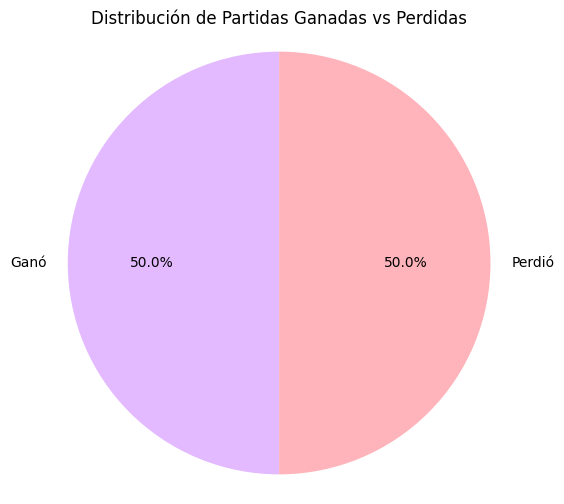

In [ ]:
counts = nata['win'].value_counts().sort_index()
labels = ['Ganó', 'Perdió']
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=cl)
plt.title('Distribución de Partidas Ganadas vs Perdidas')
plt.axis('equal')
plt.show()

Se observa que ha ganado y perdido en igual porcentaje

##Gráfico de correlaciones

In [ ]:
dfs = nata.select_dtypes(include=["number"])
dfs.corr().style.background_gradient(cmap="coolwarm").format(precision=2)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,game_duration,kills,deaths,assists,goldEarned,totalDamageDealt,csTotal,csPerMinute,neutralMinionsKilled,champLevel,visionScore,wardsPlaced,wardsKilled,controlWardsPurchased,damage_to_turrets,damage_to_objectives,dragon_kills,baron_kills,objective_steals,objective_steals_assists
game_duration,1.00,0.34,0.55,0.67,0.83,0.88,0.60,0.07,0.65,0.76,0.62,0.10,0.39,0.15,-0.30,0.31,0.17,0.44,-0.06,nan
kills,0.34,1.00,-0.10,0.31,0.71,0.48,0.14,-0.05,0.33,0.48,0.12,-0.15,0.19,-0.27,0.22,0.47,0.36,0.15,-0.23,nan
deaths,0.55,-0.10,1.00,0.18,0.24,0.23,0.50,0.27,-0.05,0.26,0.37,0.20,0.27,0.43,-0.42,-0.27,-0.30,0.10,0.21,nan
assists,0.67,0.31,0.18,1.00,0.66,0.71,0.43,0.02,0.50,0.57,0.47,0.11,0.26,0.05,-0.07,0.33,0.16,0.33,-0.06,nan
goldEarned,0.83,0.71,0.24,0.66,1.00,0.89,0.54,0.10,0.67,0.82,0.50,-0.05,0.42,-0.07,0.09,0.55,0.29,0.50,-0.12,nan
totalDamageDealt,0.88,0.48,0.23,0.71,0.89,1.00,0.53,0.04,0.81,0.79,0.48,-0.02,0.26,-0.03,-0.02,0.55,0.32,0.48,-0.17,nan
csTotal,0.60,0.14,0.50,0.43,0.54,0.53,1.00,0.82,0.13,0.38,0.42,0.08,0.40,0.20,-0.13,-0.01,-0.15,0.24,-0.03,nan
csPerMinute,0.07,-0.05,0.27,0.02,0.10,0.04,0.82,1.00,-0.26,-0.05,0.13,0.02,0.26,0.14,-0.01,-0.25,-0.33,0.00,-0.01,nan
neutralMinionsKilled,0.65,0.33,-0.05,0.50,0.67,0.81,0.13,-0.26,1.00,0.72,0.45,-0.00,0.23,-0.07,0.08,0.61,0.49,0.55,-0.11,nan
champLevel,0.76,0.48,0.26,0.57,0.82,0.79,0.38,-0.05,0.72,1.00,0.51,0.07,0.38,0.04,0.11,0.54,0.41,0.58,-0.02,nan


Buscamos la posible razón del nan en los objective steals assists

In [ ]:
print(nata.nunique())

match_id                    40
game_duration               40
champion                     3
role                         1
lane                         1
kills                       17
deaths                      14
assists                     17
goldEarned                  40
totalDamageDealt            40
csTotal                     32
csPerMinute                 40
neutralMinionsKilled        34
champLevel                   6
gameReset                    1
win                          2
visionScore                 23
wardsPlaced                 13
wardsKilled                 11
controlWardsPurchased       12
damage_to_turrets           34
damage_to_objectives        40
dragon_kills                 6
baron_kills                  3
objective_steals             3
objective_steals_assists     1
items                       40
enemy_champion              25
dtype: int64


Vemos que esta columna cuenta con valor único, por eso no se toman correlaciones, así que la omitimos para mejor visualización

In [ ]:
dfs = nata.select_dtypes(include=["number"])
dfs= dfs.loc[:, nata.nunique() > 1]
dfs.corr().style.background_gradient(cmap="coolwarm").format(precision=2)

,game_duration,kills,deaths,assists,goldEarned,totalDamageDealt,csTotal,csPerMinute,neutralMinionsKilled,champLevel,win,visionScore,wardsPlaced,wardsKilled,controlWardsPurchased,damage_to_turrets,damage_to_objectives,dragon_kills,baron_kills,objective_steals
game_duration,1.00,0.34,0.55,0.67,0.83,0.88,0.60,0.07,0.65,0.76,0.27,0.62,0.10,0.39,0.15,-0.30,0.31,0.17,0.44,-0.06
kills,0.34,1.00,-0.10,0.31,0.71,0.48,0.14,-0.05,0.33,0.48,-0.12,0.12,-0.15,0.19,-0.27,0.22,0.47,0.36,0.15,-0.23
deaths,0.55,-0.10,1.00,0.18,0.24,0.23,0.50,0.27,-0.05,0.26,0.57,0.37,0.20,0.27,0.43,-0.42,-0.27,-0.30,0.10,0.21
assists,0.67,0.31,0.18,1.00,0.66,0.71,0.43,0.02,0.50,0.57,-0.06,0.47,0.11,0.26,0.05,-0.07,0.33,0.16,0.33,-0.06
goldEarned,0.83,0.71,0.24,0.66,1.00,0.89,0.54,0.10,0.67,0.82,-0.02,0.50,-0.05,0.42,-0.07,0.09,0.55,0.29,0.50,-0.12
totalDamageDealt,0.88,0.48,0.23,0.71,0.89,1.00,0.53,0.04,0.81,0.79,-0.02,0.48,-0.02,0.26,-0.03,-0.02,0.55,0.32,0.48,-0.17
csTotal,0.60,0.14,0.50,0.43,0.54,0.53,1.00,0.82,0.13,0.38,0.28,0.42,0.08,0.40,0.20,-0.13,-0.01,-0.15,0.24,-0.03
csPerMinute,0.07,-0.05,0.27,0.02,0.10,0.04,0.82,1.00,-0.26,-0.05,0.24,0.13,0.02,0.26,0.14,-0.01,-0.25,-0.33,0.00,-0.01
neutralMinionsKilled,0.65,0.33,-0.05,0.50,0.67,0.81,0.13,-0.26,1.00,0.72,-0.23,0.45,-0.00,0.23,-0.07,0.08,0.61,0.49,0.55,-0.11
champLevel,0.76,0.48,0.26,0.57,0.82,0.79,0.38,-0.05,0.72,1.00,-0.14,0.51,0.07,0.38,0.04,0.11,0.54,0.41,0.58,-0.02


In [ ]:
nata.head()

,match_id,game_duration,champion,role,lane,kills,deaths,assists,goldEarned,totalDamageDealt,...,wardsKilled,controlWardsPurchased,damage_to_turrets,damage_to_objectives,dragon_kills,baron_kills,objective_steals,objective_steals_assists,items,enemy_champion
0,LA1_1621953043,49.98,Volibear,NONE,JUNGLE,16,9,25,22807,473023,...,5,3,1564,44522,2,0,0,0,"['Riftmaker', 'Iceborn Gauntlet', 'Spirit Visa...",Naafiri
1,LA1_1621928873,31.28,Volibear,NONE,JUNGLE,8,9,5,12666,159382,...,8,6,592,25035,2,0,2,0,"['Plated Steelcaps', 'Thornmail', ""Giant's Bel...",Vi
2,LA1_1620669620,41.60,DrMundo,NONE,JUNGLE,10,10,9,15771,325876,...,0,2,1074,46782,4,1,0,0,"[""Randuin's Omen"", 'Force of Nature', 'N/A', '...",Lillia
3,LA1_1620661452,32.40,Kindred,NONE,JUNGLE,5,7,14,12946,232474,...,5,6,242,15522,0,0,0,0,"['Recurve Bow', 'Rapid Firecannon', 'Blade of ...",Viego
4,LA1_1620653774,40.17,DrMundo,NONE,JUNGLE,6,6,22,15381,315807,...,11,5,3129,38848,3,1,0,0,"['Thornmail', 'Spirit Visage', 'Unending Despa...",RekSai


Para analizar la victoria, lo pasamos a int

In [ ]:
bool_cols = nata.select_dtypes(include='bool').columns
nata[bool_cols] = nata[bool_cols].replace({True: 1, False: 2})

<ipython-input-104-57cbda212ea1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nata[bool_cols] = nata[bool_cols].replace({True: 1, False: 2})


In [ ]:
dfs= nata.select_dtypes(include=["number"])
dfs = dfs.loc[:, nata.nunique() > 1]
dfs.corr().style.background_gradient(cmap="coolwarm").format(precision=2)

,game_duration,kills,deaths,assists,goldEarned,totalDamageDealt,csTotal,csPerMinute,neutralMinionsKilled,champLevel,win,visionScore,wardsPlaced,wardsKilled,controlWardsPurchased,damage_to_turrets,damage_to_objectives,dragon_kills,baron_kills,objective_steals
game_duration,1.00,0.34,0.55,0.67,0.83,0.88,0.60,0.07,0.65,0.76,0.27,0.62,0.10,0.39,0.15,-0.30,0.31,0.17,0.44,-0.06
kills,0.34,1.00,-0.10,0.31,0.71,0.48,0.14,-0.05,0.33,0.48,-0.12,0.12,-0.15,0.19,-0.27,0.22,0.47,0.36,0.15,-0.23
deaths,0.55,-0.10,1.00,0.18,0.24,0.23,0.50,0.27,-0.05,0.26,0.57,0.37,0.20,0.27,0.43,-0.42,-0.27,-0.30,0.10,0.21
assists,0.67,0.31,0.18,1.00,0.66,0.71,0.43,0.02,0.50,0.57,-0.06,0.47,0.11,0.26,0.05,-0.07,0.33,0.16,0.33,-0.06
goldEarned,0.83,0.71,0.24,0.66,1.00,0.89,0.54,0.10,0.67,0.82,-0.02,0.50,-0.05,0.42,-0.07,0.09,0.55,0.29,0.50,-0.12
totalDamageDealt,0.88,0.48,0.23,0.71,0.89,1.00,0.53,0.04,0.81,0.79,-0.02,0.48,-0.02,0.26,-0.03,-0.02,0.55,0.32,0.48,-0.17
csTotal,0.60,0.14,0.50,0.43,0.54,0.53,1.00,0.82,0.13,0.38,0.28,0.42,0.08,0.40,0.20,-0.13,-0.01,-0.15,0.24,-0.03
csPerMinute,0.07,-0.05,0.27,0.02,0.10,0.04,0.82,1.00,-0.26,-0.05,0.24,0.13,0.02,0.26,0.14,-0.01,-0.25,-0.33,0.00,-0.01
neutralMinionsKilled,0.65,0.33,-0.05,0.50,0.67,0.81,0.13,-0.26,1.00,0.72,-0.23,0.45,-0.00,0.23,-0.07,0.08,0.61,0.49,0.55,-0.11
champLevel,0.76,0.48,0.26,0.57,0.82,0.79,0.38,-0.05,0.72,1.00,-0.14,0.51,0.07,0.38,0.04,0.11,0.54,0.41,0.58,-0.02


Se observa que lo que está mayormente relacionado con las victorias son damage_to_turrets	damage_to_objectives	dragon_kills y baron_kills. Esto nos quiere decir que, lo que más influye a sus victorias es el daño a las torretas, seguido por el daño a los objetivos, que se ve reflejado en su asesinato a los dragones y a baron.
Por otro lado, se puede decir que las muertes, seguidas de Cs totales y la duración del juego, son variables que menor indicencia tienen, por tanto son en las que menor energías deben destinarse.
Además, a diferencia de en el caso pasado, no es muy incidente el oro que gane, por tanto también es algo superfluo a lo cual destinar esfuerzos

##Análisis campeones

In [ ]:
def win(feature):
  a=nata[nata["win"]==1][feature].value_counts()
  b=nata[nata["win"]==2][feature].value_counts()
  test = pd.DataFrame({
        "Ganó": a,
        "Perdió": b,
         }).fillna(0)
  test = test.astype(int)
  ax = test.T.plot(kind="bar", stacked=True, figsize=(12, 6))
  sns.set_palette(cl)
  ax.set_ylabel("Frecuencia")
  ax.set_xlabel("Victorias")
  ax.set_title(f"Distribución de '{feature}' por victorias")
  plt.tight_layout()
  plt.show()

In [ ]:
nata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match_id                  40 non-null     object 
 1   game_duration             40 non-null     float64
 2   champion                  40 non-null     object 
 3   role                      40 non-null     object 
 4   lane                      40 non-null     object 
 5   kills                     40 non-null     int64  
 6   deaths                    40 non-null     int64  
 7   assists                   40 non-null     int64  
 8   goldEarned                40 non-null     int64  
 9   totalDamageDealt          40 non-null     int64  
 10  csTotal                   40 non-null     int64  
 11  csPerMinute               40 non-null     float64
 12  neutralMinionsKilled      40 non-null     int64  
 13  champLevel                40 non-null     int64  
 14  gameReset   

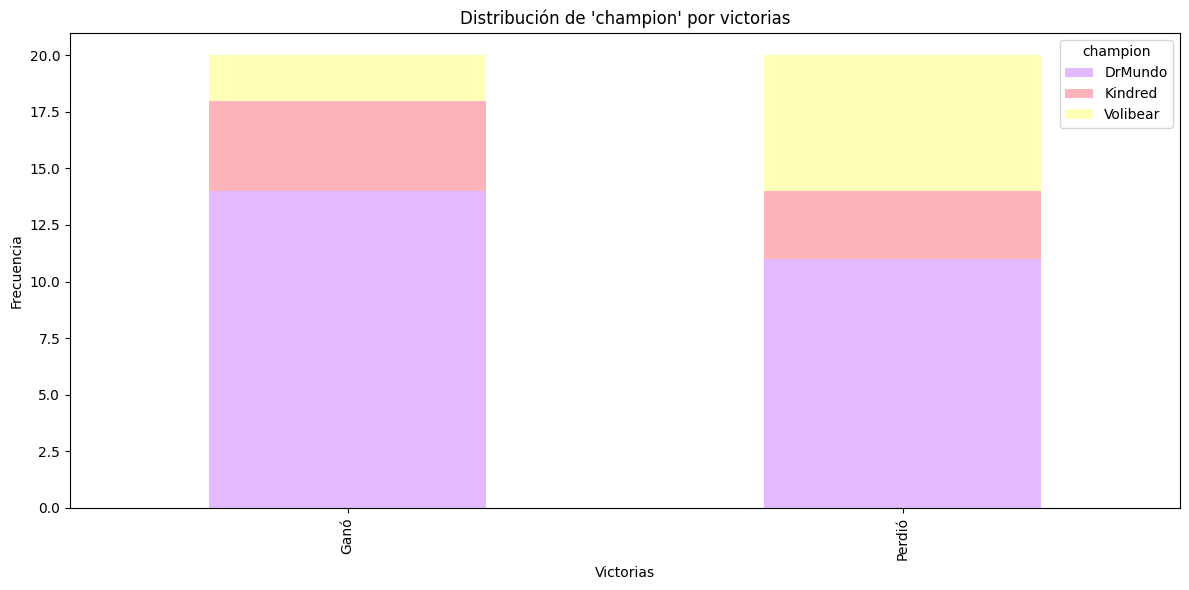

In [ ]:
win("champion")

Vemos que solo ha jugado con tres personajes, de lo que podemos decir que, no le conviene jugar con Volibear

win
1    14
2    11
Name: count, dtype: int64


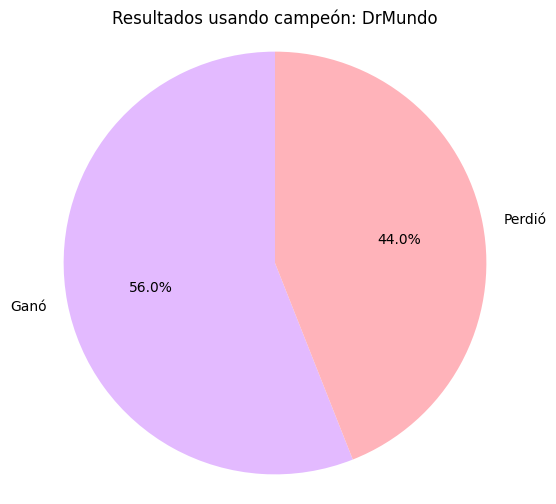

In [ ]:
# Filtrar por un avatar específico
campeon = 'DrMundo'
df_campeon = nata[nata['champion'] == campeon]

# Contar cuántas ganó y cuántas perdió
resultado = df_campeon['win'].value_counts().sort_index()
print(resultado)

labels = ['Ganó', 'Perdió']
colors = cl
plt.figure(figsize=(6,6))
plt.pie(resultado, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f"Resultados usando campeón: {campeon}")
plt.axis('equal')
plt.show()

win
1    4
2    3
Name: count, dtype: int64


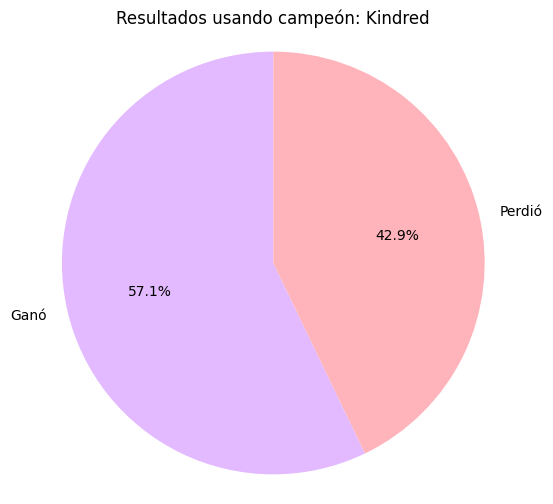

In [ ]:
# Filtrar por un avatar específico
campeon = 'Kindred'
df_campeon = nata[nata['champion'] == campeon]

# Contar cuántas ganó y cuántas perdió
resultado = df_campeon['win'].value_counts().sort_index()
print(resultado)

labels = ['Ganó', 'Perdió']
colors = cl
plt.figure(figsize=(6,6))
plt.pie(resultado, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f"Resultados usando campeón: {campeon}")
plt.axis('equal')
plt.show()

win
1    2
2    6
Name: count, dtype: int64


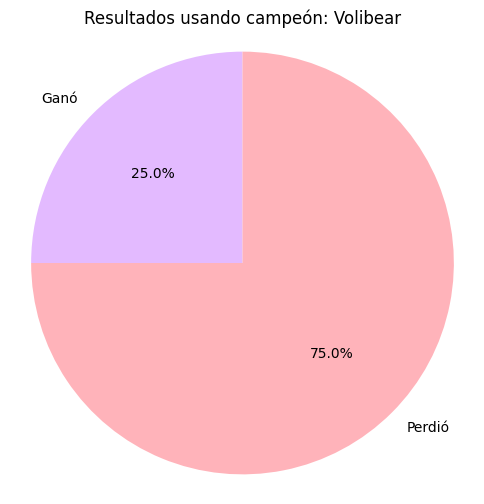

In [ ]:
# Filtrar por un avatar específico
campeon = 'Volibear'
df_campeon = nata[nata['champion'] == campeon]

# Contar cuántas ganó y cuántas perdió
resultado = df_campeon['win'].value_counts().sort_index()
print(resultado)

labels = ['Ganó', 'Perdió']
colors = cl
plt.figure(figsize=(6,6))
plt.pie(resultado, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f"Resultados usando campeón: {campeon}")
plt.axis('equal')
plt.show()

Se observa que, con relación a la cantidad de partidas que jugó con cada campeón, él tiene mayores probabilidades de ganar jugando con Kindred, aunque es a tener en cuenta que al ser el jugador con el que menos partidas jugó, se puede esperar un sesgo de los datos, al igual que con Volibear. Pero, teniendo en cuenta estas cifras, el jugador con el que tiene mayores probabilidades de ganar es con Dr Mundo

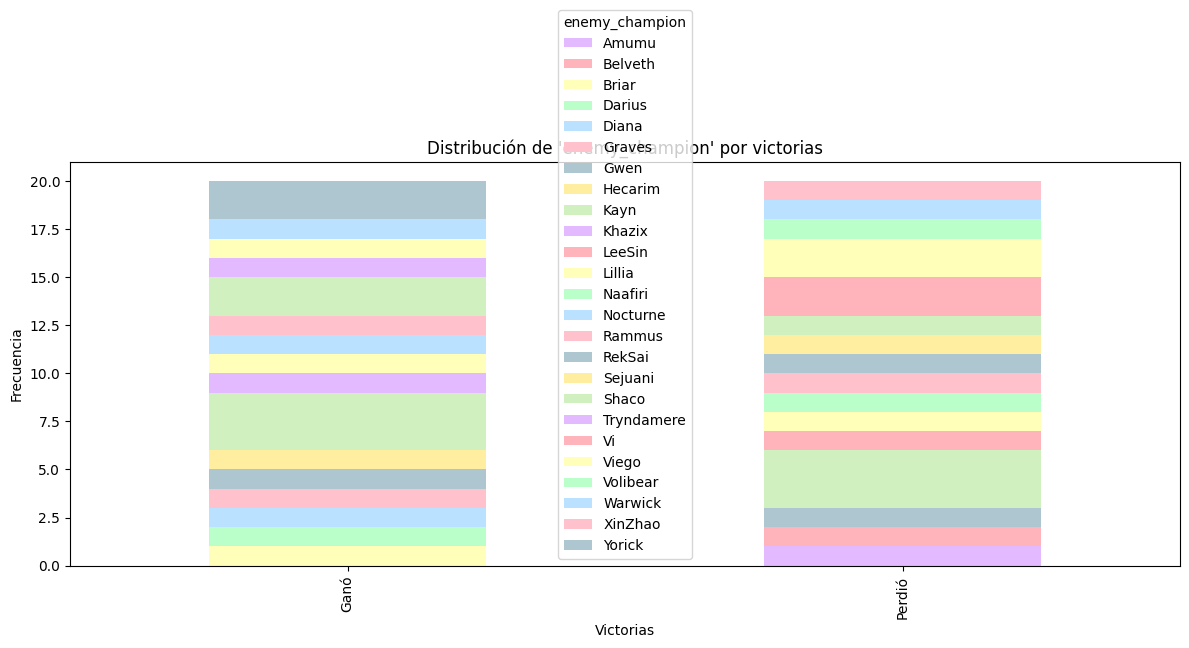

In [ ]:
win("enemy_champion")

Se observa una variedad de campeones contra los cuales perdió, por lo que no es algo muy incidente en su victoria

##Análisis variables incidentes a victoria

In [ ]:
nata['damage_to_objectives'].agg(['min', 'median', 'max'])

,damage_to_objectives
min,7889.0
median,43589.0
max,70589.0


In [ ]:
nata["damage_to_objectives_rango"]=pd.cut(nata["damage_to_objectives"], bins=[7889,20000,43589,55000,70589, float("inf")], labels=[0,1,2,3,4],right=False)
nata.head()

,match_id,game_duration,champion,role,lane,kills,deaths,assists,goldEarned,totalDamageDealt,...,controlWardsPurchased,damage_to_turrets,damage_to_objectives,dragon_kills,baron_kills,objective_steals,objective_steals_assists,items,enemy_champion,damage_to_objectives_rango
0,LA1_1621953043,49.98,Volibear,NONE,JUNGLE,16,9,25,22807,473023,...,3,1564,44522,2,0,0,0,"['Riftmaker', 'Iceborn Gauntlet', 'Spirit Visa...",Naafiri,2
1,LA1_1621928873,31.28,Volibear,NONE,JUNGLE,8,9,5,12666,159382,...,6,592,25035,2,0,2,0,"['Plated Steelcaps', 'Thornmail', ""Giant's Bel...",Vi,1
2,LA1_1620669620,41.60,DrMundo,NONE,JUNGLE,10,10,9,15771,325876,...,2,1074,46782,4,1,0,0,"[""Randuin's Omen"", 'Force of Nature', 'N/A', '...",Lillia,2
3,LA1_1620661452,32.40,Kindred,NONE,JUNGLE,5,7,14,12946,232474,...,6,242,15522,0,0,0,0,"['Recurve Bow', 'Rapid Firecannon', 'Blade of ...",Viego,0
4,LA1_1620653774,40.17,DrMundo,NONE,JUNGLE,6,6,22,15381,315807,...,5,3129,38848,3,1,0,0,"['Thornmail', 'Spirit Visage', 'Unending Despa...",RekSai,1


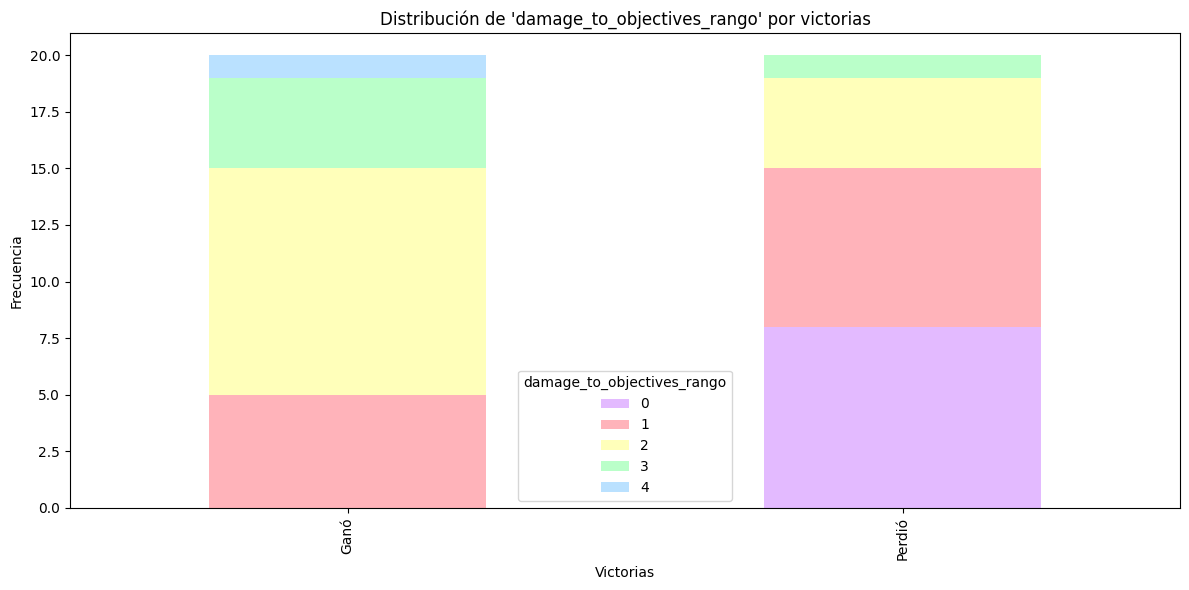

In [ ]:
win("damage_to_objectives_rango")

win
1    5
2    7
Name: count, dtype: int64


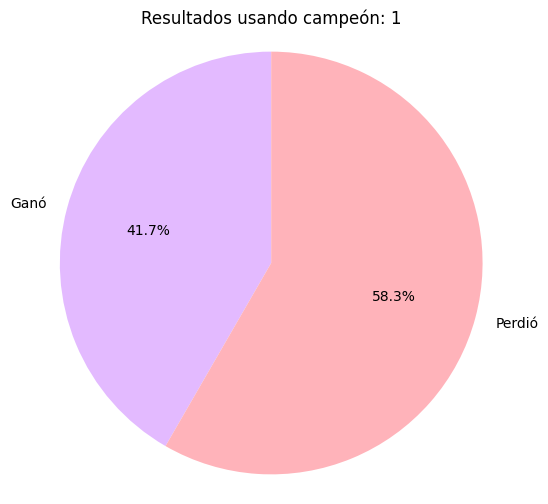

In [ ]:
# Filtrar por un avatar específico
rang_Obj = 1
df_daño = nata[nata["damage_to_objectives_rango"] == rang_Obj]

# Contar cuántas ganó y cuántas perdió
resultado = df_daño['win'].value_counts().sort_index()
print(resultado)

labels = ['Ganó', 'Perdió']
colors = cl
plt.figure(figsize=(6,6))
plt.pie(resultado, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f"Resultados usando campeón: {rang_Obj}")
plt.axis('equal')
plt.show()

Es evidente que la en aquellas partidas donde hace un mayor rango de daño, tiene mayores posibilidades de ganar

In [ ]:
#ver valores que hay en la columna y la frecuencia que tienen
valores_unicos = nata['damage_to_objectives_rango'].unique()
conteo = nata['damage_to_objectives_rango'].value_counts()
print("Valores únicos en 'damage_to_objectives_rango':")
print(valores_unicos,conteo)

Valores únicos en 'damage_to_objectives_rango':
[2, 1, 0, 3, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4] damage_to_objectives_rango
2    14
1    12
0     8
3     5
4     1
Name: count, dtype: int64


In [ ]:
nata['damage_to_turrets'].agg(['min', 'median', 'max'])

,damage_to_turrets
min,0.0
median,2173.5
max,9054.0


In [ ]:
nata["damage_to_turrets_rango"]=pd.cut(nata["damage_to_turrets"], bins=[0,1000,2173,5000,9054, float("inf")], labels=[0,1,2,3,4],right=False)
nata.head()

,match_id,game_duration,champion,role,lane,kills,deaths,assists,goldEarned,totalDamageDealt,...,damage_to_turrets,damage_to_objectives,dragon_kills,baron_kills,objective_steals,objective_steals_assists,items,enemy_champion,damage_to_objectives_rango,damage_to_turrets_rango
0,LA1_1621953043,49.98,Volibear,NONE,JUNGLE,16,9,25,22807,473023,...,1564,44522,2,0,0,0,"['Riftmaker', 'Iceborn Gauntlet', 'Spirit Visa...",Naafiri,2,1
1,LA1_1621928873,31.28,Volibear,NONE,JUNGLE,8,9,5,12666,159382,...,592,25035,2,0,2,0,"['Plated Steelcaps', 'Thornmail', ""Giant's Bel...",Vi,1,0
2,LA1_1620669620,41.60,DrMundo,NONE,JUNGLE,10,10,9,15771,325876,...,1074,46782,4,1,0,0,"[""Randuin's Omen"", 'Force of Nature', 'N/A', '...",Lillia,2,1
3,LA1_1620661452,32.40,Kindred,NONE,JUNGLE,5,7,14,12946,232474,...,242,15522,0,0,0,0,"['Recurve Bow', 'Rapid Firecannon', 'Blade of ...",Viego,0,0
4,LA1_1620653774,40.17,DrMundo,NONE,JUNGLE,6,6,22,15381,315807,...,3129,38848,3,1,0,0,"['Thornmail', 'Spirit Visage', 'Unending Despa...",RekSai,1,2


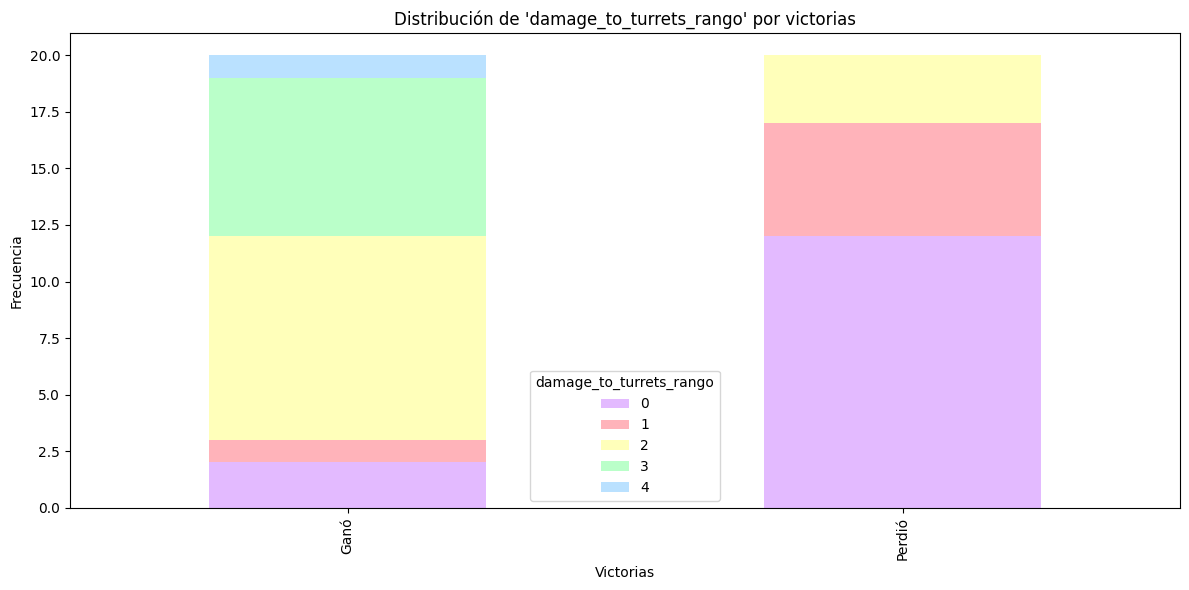

In [ ]:
win("damage_to_turrets_rango")

In [ ]:
nata['dragon_kills'].agg(['min', 'median', 'max'])

,dragon_kills
min,0.0
median,2.0
max,5.0


In [ ]:
nata["dragon_kills_rango"]=pd.cut(nata["dragon_kills"], bins=[0,1.5,2.5,3.5,5, float("inf")], labels=[0,1,2,3,4],right=False)
nata.head()

,match_id,game_duration,champion,role,lane,kills,deaths,assists,goldEarned,totalDamageDealt,...,damage_to_objectives,dragon_kills,baron_kills,objective_steals,objective_steals_assists,items,enemy_champion,damage_to_objectives_rango,damage_to_turrets_rango,dragon_kills_rango
0,LA1_1621953043,49.98,Volibear,NONE,JUNGLE,16,9,25,22807,473023,...,44522,2,0,0,0,"['Riftmaker', 'Iceborn Gauntlet', 'Spirit Visa...",Naafiri,2,1,1
1,LA1_1621928873,31.28,Volibear,NONE,JUNGLE,8,9,5,12666,159382,...,25035,2,0,2,0,"['Plated Steelcaps', 'Thornmail', ""Giant's Bel...",Vi,1,0,1
2,LA1_1620669620,41.60,DrMundo,NONE,JUNGLE,10,10,9,15771,325876,...,46782,4,1,0,0,"[""Randuin's Omen"", 'Force of Nature', 'N/A', '...",Lillia,2,1,3
3,LA1_1620661452,32.40,Kindred,NONE,JUNGLE,5,7,14,12946,232474,...,15522,0,0,0,0,"['Recurve Bow', 'Rapid Firecannon', 'Blade of ...",Viego,0,0,0
4,LA1_1620653774,40.17,DrMundo,NONE,JUNGLE,6,6,22,15381,315807,...,38848,3,1,0,0,"['Thornmail', 'Spirit Visage', 'Unending Despa...",RekSai,1,2,2


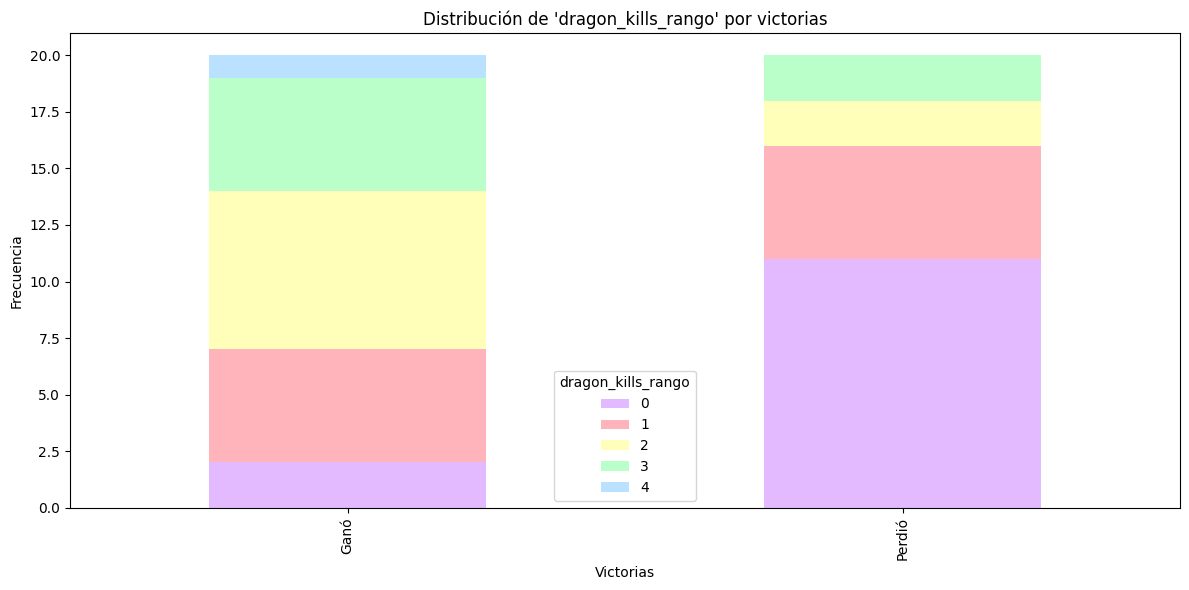

In [ ]:
win("dragon_kills_rango")

In [ ]:
nata['baron_kills'].agg(['min', 'median', 'max'])

,baron_kills
min,0.0
median,0.0
max,2.0


In [ ]:
nata["baron_kills_rango"]=pd.cut(nata["baron_kills"], bins=[0,1,2, float("inf")], labels=[0,1,2],right=False)
nata.head()

,match_id,game_duration,champion,role,lane,kills,deaths,assists,goldEarned,totalDamageDealt,...,dragon_kills,baron_kills,objective_steals,objective_steals_assists,items,enemy_champion,damage_to_objectives_rango,damage_to_turrets_rango,dragon_kills_rango,baron_kills_rango
0,LA1_1621953043,49.98,Volibear,NONE,JUNGLE,16,9,25,22807,473023,...,2,0,0,0,"['Riftmaker', 'Iceborn Gauntlet', 'Spirit Visa...",Naafiri,2,1,1,0
1,LA1_1621928873,31.28,Volibear,NONE,JUNGLE,8,9,5,12666,159382,...,2,0,2,0,"['Plated Steelcaps', 'Thornmail', ""Giant's Bel...",Vi,1,0,1,0
2,LA1_1620669620,41.60,DrMundo,NONE,JUNGLE,10,10,9,15771,325876,...,4,1,0,0,"[""Randuin's Omen"", 'Force of Nature', 'N/A', '...",Lillia,2,1,3,1
3,LA1_1620661452,32.40,Kindred,NONE,JUNGLE,5,7,14,12946,232474,...,0,0,0,0,"['Recurve Bow', 'Rapid Firecannon', 'Blade of ...",Viego,0,0,0,0
4,LA1_1620653774,40.17,DrMundo,NONE,JUNGLE,6,6,22,15381,315807,...,3,1,0,0,"['Thornmail', 'Spirit Visage', 'Unending Despa...",RekSai,1,2,2,1


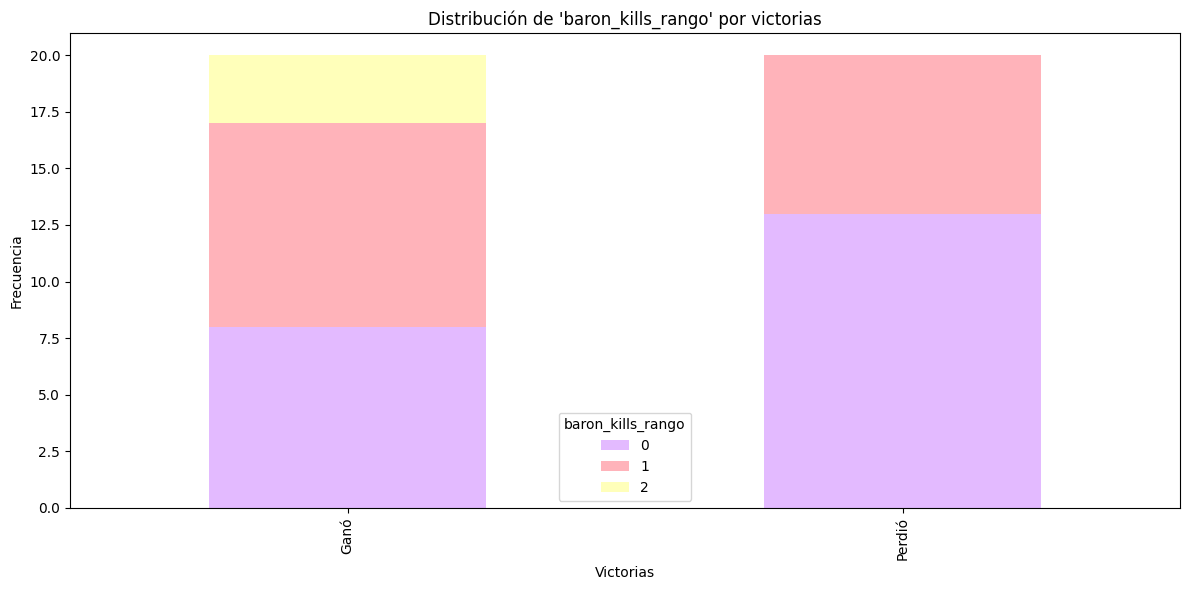

In [ ]:
win("baron_kills_rango")

Es evidente como en cada caso, para los daños a objetivos, las muertes a dragones, a baron y el daño a torres, cuento estos son mayores, es que hay mayores probabilidades de victoria

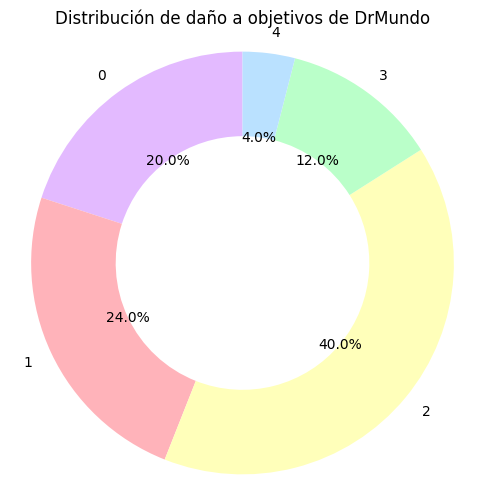

In [ ]:

# Filtrar por el campeón deseado
campeon = "DrMundo"
dff = nata[nata["champion"] == campeon]

# Contar frecuencias de los rangos
conteo = dff["damage_to_objectives_rango"].value_counts().sort_index()

# Crear gráfico de dona
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
plt.title(f"Distribución de daño a objetivos de {campeon}")
plt.axis('equal')
plt.show()

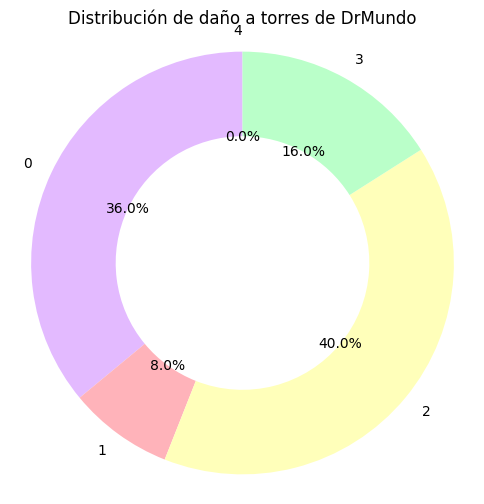

In [ ]:
# Filtrar por el campeón deseado
campeon = "DrMundo"
dff = nata[nata["champion"] == campeon]

# Contar frecuencias de los rangos
conteo = dff["damage_to_turrets_rango"].value_counts().sort_index()

# Crear gráfico de dona
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
plt.title(f"Distribución de daño a torres de {campeon}")
plt.axis('equal')
plt.show()

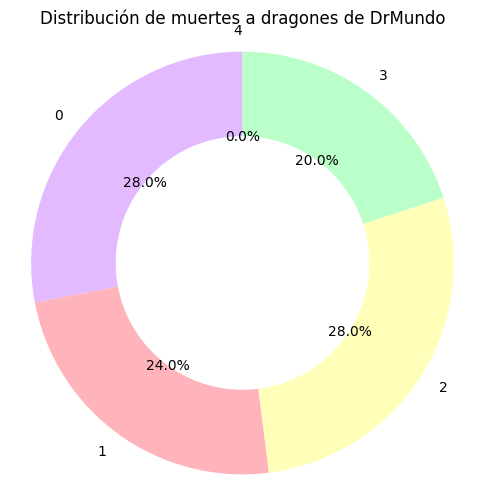

In [ ]:
# Filtrar por el campeón deseado
campeon = "DrMundo"
dff = nata[nata["champion"] == campeon]

# Contar frecuencias de los rangos
conteo = dff["dragon_kills_rango"].value_counts().sort_index()

# Crear gráfico de dona
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
plt.title(f"Distribución de muertes a dragones de {campeon}")
plt.axis('equal')
plt.show()

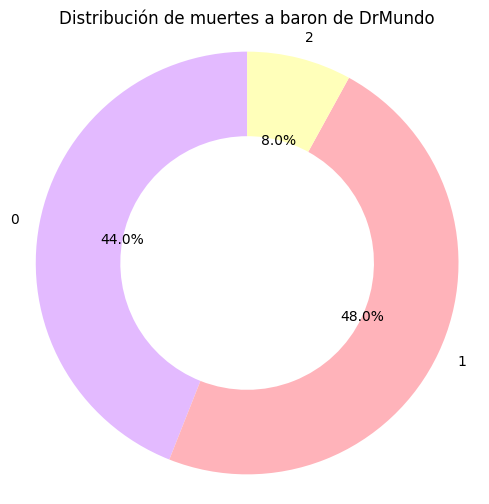

In [ ]:
# Filtrar por el campeón deseado
campeon = "DrMundo"
dff = nata[nata["champion"] == campeon]

# Contar frecuencias de los rangos
conteo = dff["baron_kills_rango"].value_counts().sort_index()

# Crear gráfico de dona
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
plt.title(f"Distribución de muertes a baron de {campeon}")
plt.axis('equal')
plt.show()

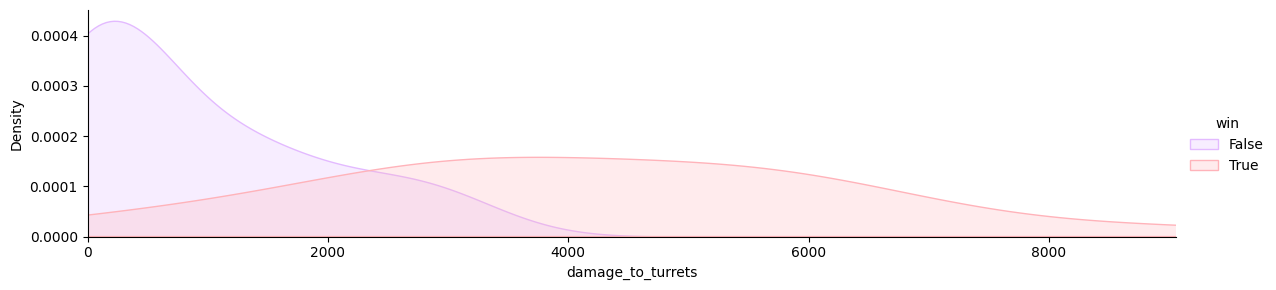

In [ ]:
facet=sns.FacetGrid(df,hue="win",aspect=4)
facet.map(sns.kdeplot,"damage_to_turrets",fill=True)
facet.set(xlim=(0,df["damage_to_turrets"].max()))
facet.add_legend()
plt.show()

En general, a mayor daño a torretas, mayor probabilidad de ganar.
Esto sugiere que el daño a estructuras es un factor clave para la victoria.

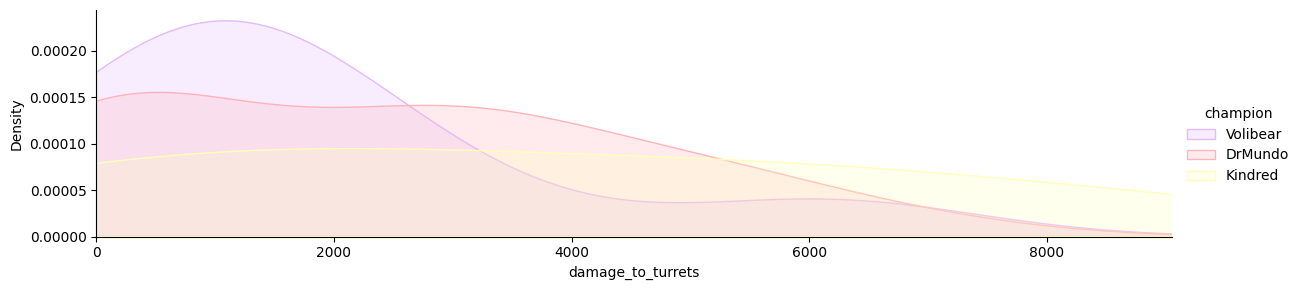

In [ ]:
facet=sns.FacetGrid(df,hue="champion",aspect=4)
facet.map(sns.kdeplot,"damage_to_turrets",fill=True)
facet.set(xlim=(0,df["damage_to_turrets"].max()))
facet.add_legend()
plt.show()

- Volibear (lila): Tiene un pico de densidad fuerte alrededor de los 2000 de daño, lo que sugiere que la mayoría de sus partidas tienen ese valor típico de daño a torretas.

- DrMundo (rosado): Tiene una distribución más ancha, también con un pico moderado cercano a los 2000, pero con más dispersión hacia valores medios.

- Kindred (amarillo): Su densidad es más baja al inicio y se extiende hasta valores más altos (7000–9000), lo que indica que algunas partidas con Kindred hicieron mucho daño a torretas.

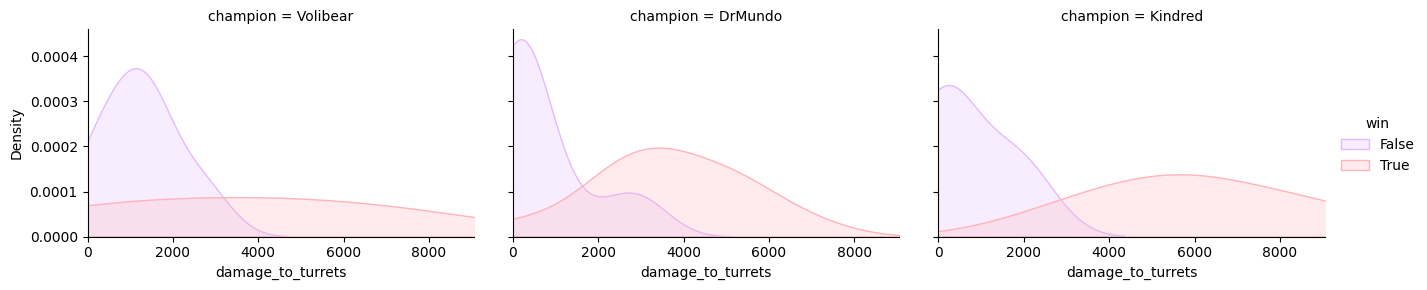

In [ ]:
facet = sns.FacetGrid(df, col="champion", hue="win", aspect=1.5, col_wrap=3)
facet.map(sns.kdeplot, "damage_to_turrets", fill=True)
facet.set(xlim=(0, df["damage_to_turrets"].max()))
facet.add_legend()
plt.show()

En la comparación entre Volibear, DrMundo y Kindred, se observa un patrón común y consistente, que los jugadores que infligen más daño a torretas tienen mayores probabilidades de ganar la partida, sin importar el campeón utilizado.